In [2]:
from matplotlib import font_manager, rc

font_path = '/Windows/Fonts/batang.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [6]:
!pip install bs4

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=432bb6c1b2db2454e169438b034fad86857dd2480f1425ef0127583ac7aab612
  Stored in directory: c:\users\skjung_gram\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [16]:
import requests
import bs4

url = 'https://news.daum.net/'
res = requests.get(url)

#print(res.text)

soup = bs4.BeautifulSoup(res.text)
#print(soup)
#data = soup.find('a')
data = soup.find_all('a')
#print(data)

In [18]:
category_url = {
    '메인': ['https://news.daum.net/'],
    '사회': ['https://news.daum.net/society'],
    '정치': ['https://news.daum.net/politics'],
    '경제': ['https://news.daum.net/economic'],
    '국제': ['https://news.daum.net/foreign'],
    '문화': ['https://news.daum.net/culture'],
    'IT': ['https://news.daum.net/digital']
}

In [19]:
for i, j in category_url.items() :
    res = requests.get(j[0])
    j.append(res.text)

In [22]:
#print(category_url['문화'])

In [24]:
temp = []

for i, j in category_url.items() :
    soup = bs4.BeautifulSoup(j[1])
    
    for n in soup.find_all('span', attrs={'class': 'info_cp'}) :
        temp.append(n.text.strip())
        
    for n in soup.find_all('span', attrs={'class': 'info_thumb'}) :
        if n.find('a') == None :
            if '\n' in n.text.strip() :
                temp.append(n.text.strip().split('\n')[0])
            elif n.text.strip() == '' :
                temp.append(n.find('img', alt=True)['alt'])
            else :
                temp.append(n.text.strip())
    

In [25]:
print(temp)

['국제', '정치', '사회', '정치', '국제', '정치', '사회', '사회', '사회', '사회', '정치', '사회', '경제', '경제', '사회', '경제', '국제', '국제', '정치', '경제', '머니투데이', '노컷뉴스', '서울신문', 'YTN', '뉴스1', '대구MBC', '서울신문', '미디어오늘', '뉴스1', '뉴스1', '강원도민일보', '조선비즈', '뉴스1', '헬스조선', '노컷뉴스', '연합뉴스', '경향신문', '연합뉴스', '뉴시스', '뉴시스', '국제신문', '전주MBC', '문화일보', '연합뉴스', 'YTN', '서울신문', 'YTN', '연합뉴스TV', 'MBC', 'KBS', '한겨레', '경향신문', 'SBS', '데일리안', 'YTN', '연합뉴스', '이데일리', '뉴시스', '한국일보', '한겨레', 'YTN', '연합뉴스', '뉴시스', '매일경제', '뉴스1', '데일리안', '뉴스1', 'MBC', '연합뉴스', '뉴스1', 'kbc광주방송', 'SBS', '시사IN', '오마이뉴스', '서울신문', 'MBN', 'KBS', '채널A', '헤럴드경제', '뉴시스', '뉴스1', '뉴시스', 'KBS', '뉴시스', '연합뉴스', '뉴시스', '이데일리', '뉴시스', '연합뉴스', '국제신문', '전주MBC', '헤럴드경제', '헤럴드경제', '아시아경제', '한국경제', 'SBS', 'JTBC', '헤럴드경제', '한국경제TV', '서울경제', 'SBS Biz', '프레시안', 'YTN', '연합뉴스', '한겨레', '아시아경제', '서울신문', '뉴스1', '뉴시스', '연합뉴스', '헤럴드경제', '헤럴드경제', '뉴시스', '연합뉴스', '연합뉴스', '연합뉴스', '한겨레', '한겨레', '조선일보', '뉴시스', '서울신문', 'KBS', 'KBS', '서울신문', '오마이뉴스', 'JTBC', 'SBS Biz', 'KBS', '뉴시스', 'MBN', '서울신문', '뉴시스', '

In [27]:
temp_a = []
soup = bs4.BeautifulSoup(category_url['IT'][1])
for i in soup.find_all('span', attrs={'class': 'info_thumb'}):
    if i.find('a') == None :
        print(i.text.strip())
        temp_a.append(i.text.strip())
        
print(temp_a)

헤럴드경제
한겨레
뉴시스
뉴스1
머니투데이
뉴시스
아이뉴스24
한국경제
조선비즈
조선일보
전자신문
한국경제
이데일리
아이뉴스24
전자신문
['헤럴드경제', '한겨레', '뉴시스', '뉴스1', '머니투데이', '뉴시스', '아이뉴스24', '한국경제', '조선비즈', '조선일보', '전자신문', '한국경제', '이데일리', '아이뉴스24', '전자신문']


In [28]:
for i,j in category_url.items():
    soup = bs4.BeautifulSoup(j[1])
    # 언론사 리스트
    temp = []
    
    for n in soup.find_all('span', attrs={'class':'info_cp'}):      
        temp.append(n.text.strip())
        
    for n in soup.find_all('span', attrs={'class': 'info_thumb'}):
        if n.find('a') == None:
            
            if '\n' in n.text.strip():
                temp.append(n.text.strip().split('\n')[0])
            elif n.text.strip() == '':
                temp.append(n.find('img', alt=True)['alt'])
            else:
                temp.append(n.text.strip())
    
    j.append(temp)

In [29]:
print(category_url['IT'][2])

['연합뉴스', '연합뉴스', '비즈니스워치', '조선비즈', '뉴스1', '지디넷코리아', '지디넷코리아', '머니투데이', '아이뉴스24', '지디넷코리아', '헤럴드경제', '한겨레', '뉴시스', '뉴스1', '머니투데이', '뉴시스', '아이뉴스24', '한국경제', '조선비즈', '조선일보', '전자신문', '한국경제', '이데일리', '아이뉴스24', '전자신문']


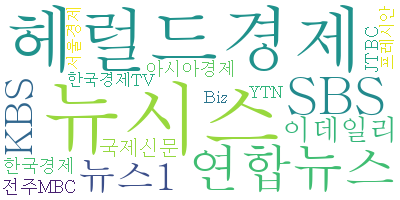

In [30]:
import wordcloud

text = ' '.join(category_url['경제'][2])
#print(text)
wc = wordcloud.WordCloud(font_path=font_path, background_color='white')
wc.generate_from_text(text)
wc.to_image()

In [31]:
import requests
import bs4

url = 'https://news.daum.net/'
res = requests.get(url)

In [32]:
# 모든 언론사 리스트
data = []
for i, j in category_url.items():
    if i != '메인':
        data.extend(j[2])

unique_data = list(set(data))

print(unique_data)

['헤럴드경제', '서울신문', '연합뉴스TV', '대전일보', '아이뉴스24', 'SBS', '머니투데이', '프레시안', '조선비즈', '데일리안', '노컷뉴스', '서울경제', '코메디닷컴', '전자신문', '경향신문', '비즈니스워치', '뉴스1', 'MBN', '채널A', '디지털타임스', '조선일보', '지디넷코리아', '문화일보', '한국경제TV', 'kbc광주방송', '시사IN', '키즈맘', '연합뉴스', '한겨레21', 'JTBC', '투어코리아', '헬스조선', 'KBS', 'SBS Biz', '마리끌레르', '한국일보', '강원도민일보', '메종', '한겨레', 'MBC', '매일경제', '국제신문', '뉴시스', '오마이뉴스', '여성동아', '한국경제', 'YTN', '아시아경제', '세계일보', '이데일리', '더스쿠프', '웨딩21뉴스', '전주MBC']


In [33]:
# 분야별
rank = {}
for i in unique_data:
    rank[i]=0

for i in category_url['IT'][2]:
    rank[i] += 1
    
print(rank)

{'헤럴드경제': 1, '서울신문': 0, '연합뉴스TV': 0, '대전일보': 0, '아이뉴스24': 3, 'SBS': 0, '머니투데이': 2, '프레시안': 0, '조선비즈': 2, '데일리안': 0, '노컷뉴스': 0, '서울경제': 0, '코메디닷컴': 0, '전자신문': 2, '경향신문': 0, '비즈니스워치': 1, '뉴스1': 2, 'MBN': 0, '채널A': 0, '디지털타임스': 0, '조선일보': 1, '지디넷코리아': 3, '문화일보': 0, '한국경제TV': 0, 'kbc광주방송': 0, '시사IN': 0, '키즈맘': 0, '연합뉴스': 2, '한겨레21': 0, 'JTBC': 0, '투어코리아': 0, '헬스조선': 0, 'KBS': 0, 'SBS Biz': 0, '마리끌레르': 0, '한국일보': 0, '강원도민일보': 0, '메종': 0, '한겨레': 1, 'MBC': 0, '매일경제': 0, '국제신문': 0, '뉴시스': 2, '오마이뉴스': 0, '여성동아': 0, '한국경제': 2, 'YTN': 0, '아시아경제': 0, '세계일보': 0, '이데일리': 1, '더스쿠프': 0, '웨딩21뉴스': 0, '전주MBC': 0}


<function matplotlib.pyplot.show(close=None, block=None)>

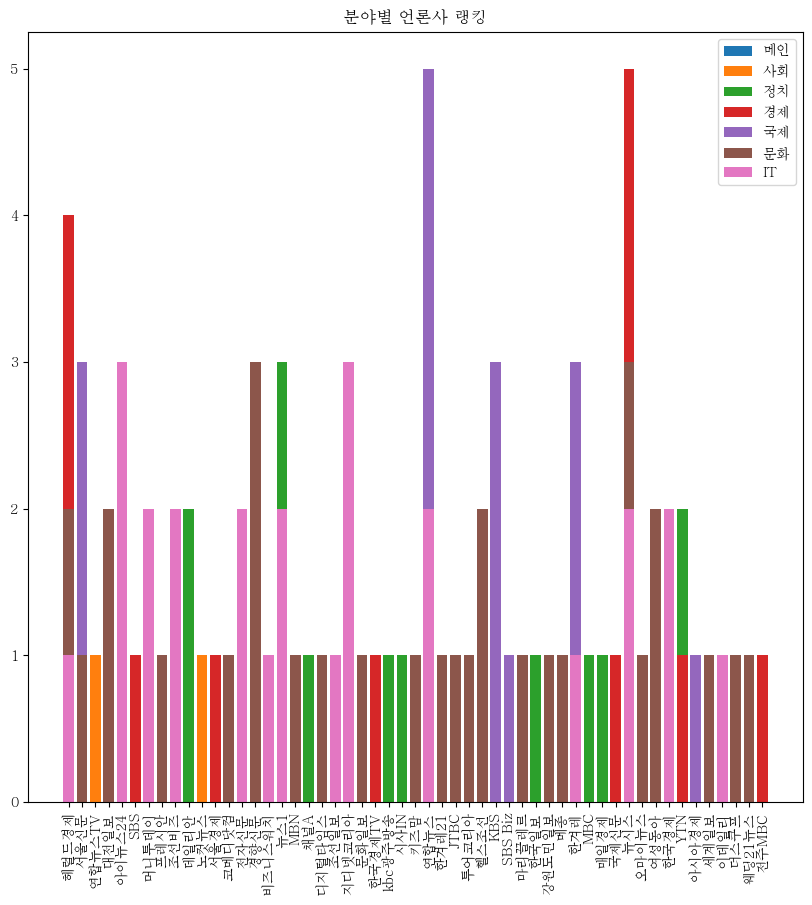

In [34]:
import matplotlib.pyplot as plt

#print('경제' in unique_data)

#rank = {}

plt.figure(figsize=(10,10))

for i in category_url.keys():
    
    rank = {}
    
    for j  in unique_data:
        rank[j] = 0
    
    for j in category_url[i][2]:
        if i == '메인':
            continue
        rank[j] += 1
        
    x = rank.keys()
    y = rank.values()
    plt.bar(x,y,label=i)

plt.xticks(rotation=90)
plt.legend()
plt.title('분야별 언론사 랭킹')
plt.show

In [36]:
# 전체 데이터 출력
print(data)

['뉴스1', '뉴스1', '강원도민일보', '조선비즈', '뉴스1', '헬스조선', '노컷뉴스', '연합뉴스', '경향신문', '연합뉴스', '뉴시스', '뉴시스', '국제신문', '전주MBC', '문화일보', '연합뉴스', 'YTN', '서울신문', 'YTN', '연합뉴스TV', 'MBC', 'KBS', '한겨레', '경향신문', 'SBS', '데일리안', 'YTN', '연합뉴스', '이데일리', '뉴시스', '한국일보', '한겨레', 'YTN', '연합뉴스', '뉴시스', '매일경제', '뉴스1', '데일리안', '뉴스1', 'MBC', '연합뉴스', '뉴스1', 'kbc광주방송', 'SBS', '시사IN', '오마이뉴스', '서울신문', 'MBN', 'KBS', '채널A', '헤럴드경제', '뉴시스', '뉴스1', '뉴시스', 'KBS', '뉴시스', '연합뉴스', '뉴시스', '이데일리', '뉴시스', '연합뉴스', '국제신문', '전주MBC', '헤럴드경제', '헤럴드경제', '아시아경제', '한국경제', 'SBS', 'JTBC', '헤럴드경제', '한국경제TV', '서울경제', 'SBS Biz', '프레시안', 'YTN', '연합뉴스', '한겨레', '아시아경제', '서울신문', '뉴스1', '뉴시스', '연합뉴스', '헤럴드경제', '헤럴드경제', '뉴시스', '연합뉴스', '연합뉴스', '연합뉴스', '한겨레', '한겨레', '조선일보', '뉴시스', '서울신문', 'KBS', 'KBS', '서울신문', '오마이뉴스', 'JTBC', 'SBS Biz', 'KBS', '뉴시스', 'MBN', '서울신문', '뉴시스', '연합뉴스', '뉴시스', '헬스조선', '강원도민일보', '프레시안', '한겨레21', '헤럴드경제', '문화일보', '더스쿠프', '헤럴드경제', '오마이뉴스', '여성동아', '키즈맘', '헬스조선', '코메디닷컴', '웨딩21뉴스', '여성동아', '메종', '투어코리아', '마리끌레르', 'JTBC', '대전일보', '조선

In [38]:
# 전체 랭킹
rank = {}

for i in data:
    if rank.get(i) == None :
        rank[i] = 1
    else:
        rank[i] += 1

print(rank)

{'뉴스1': 10, '강원도민일보': 2, '조선비즈': 3, '헬스조선': 3, '노컷뉴스': 1, '연합뉴스': 16, '경향신문': 5, '뉴시스': 17, '국제신문': 2, '전주MBC': 2, '문화일보': 2, 'YTN': 5, '서울신문': 6, '연합뉴스TV': 1, 'MBC': 2, 'KBS': 6, '한겨레': 6, 'SBS': 3, '데일리안': 2, '이데일리': 3, '한국일보': 1, '매일경제': 1, 'kbc광주방송': 1, '시사IN': 1, '오마이뉴스': 3, 'MBN': 2, '채널A': 1, '헤럴드경제': 9, '아시아경제': 2, '한국경제': 3, 'JTBC': 3, '한국경제TV': 1, '서울경제': 1, 'SBS Biz': 2, '프레시안': 2, '조선일보': 3, '한겨레21': 1, '더스쿠프': 1, '여성동아': 2, '키즈맘': 1, '코메디닷컴': 1, '웨딩21뉴스': 1, '메종': 1, '투어코리아': 1, '마리끌레르': 1, '대전일보': 2, '세계일보': 1, '디지털타임스': 1, '비즈니스워치': 1, '지디넷코리아': 3, '머니투데이': 2, '아이뉴스24': 3, '전자신문': 2}


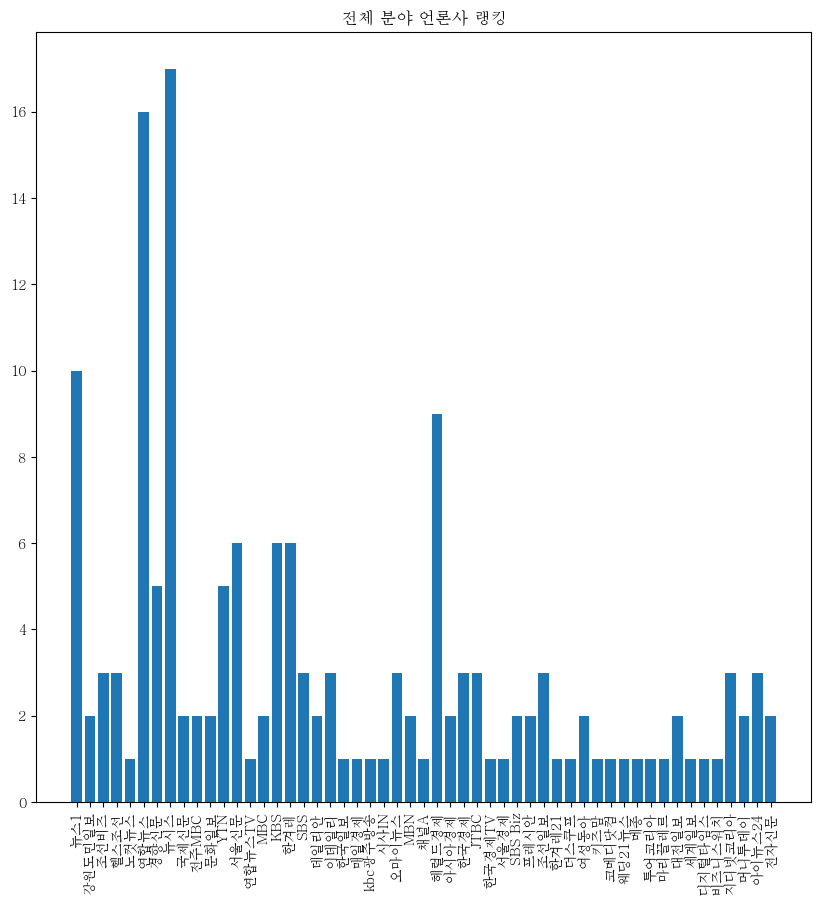

In [39]:
plt.figure(figsize=(10,10))

x = rank.keys()
y = rank.values()

plt.bar(x,y)

plt.xticks(rotation=90)
plt.title('전체 분야 언론사 랭킹')
plt.show()

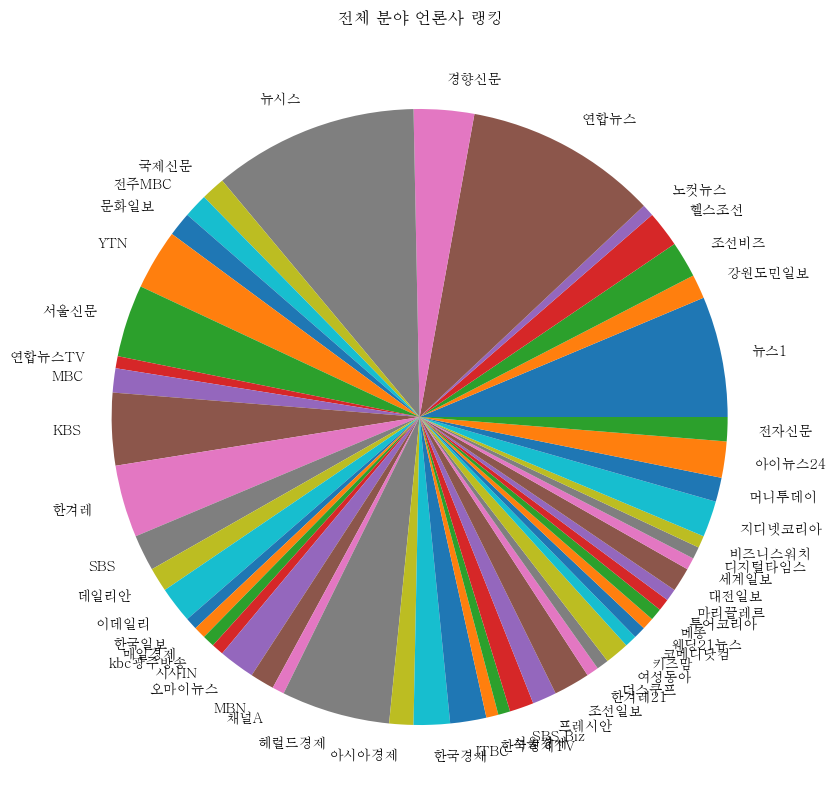

In [40]:
plt.figure(figsize=(10,10))

x = rank.keys()
y = rank.values()

plt.pie(y, labels=x)

plt.title('전체 분야 언론사 랭킹')
plt.show()